**YOUR NAME HERE**

CS 251/2: Data Analysis and Visualization

Spring 2024

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import distance

import kmeans

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

# Project 5 | Clustering

## AI Policy

To improve the quality of your learning and out of fairness to your hardworking classmates, AI (e.g. ChatGPT, Copilot, etc.) should NOT be used in ANY way on this project and extensions. This includes both written analysis, plotting, and code. I will only grade your work, not the AI's. I will stop grading your project if I notice AI-generated content (in any capacity).

## Task 1: K-means clustering

In this task, you will implement the K-means clustering algorithm and test your code on simple test data.

### 1a. Import `super_simple` data

- In the cell below, use load in the `super_simple.csv` dataset (30 x,y values). Convert it (if necessary) to a ndarray with shape `(30, 2)`.
- Create a scatter plot below to see what the data look like.

### 1b. Implement and test core K-means methods

In this task, you will implement the methods needed to cluster a dataset using K-means. The goal of this subtask is to create a scatterplot with each data sample color-coded based on the cluster it belongs to. You will be testing on the `super_simple` data.

In `kmeans.py` implement the following methods, using the following test code to help you out along the way:
- `set_data`: Update the data stored by the k-means clustering object.
- `get_data`: Return a copy of the data.
- `dist_pt_to_pt`: Compute the Euclidean distance from one data sample to one other. See below for formula.
- `dist_pt_to_centroids`: Compute the distance from one data sample to all the cluster centroids.
- `initialize`: Initalize K-means by setting the initial centroids
- `update_labels`: Assign each data sample to the nearest centroid
- `update_centroids`: Calculate each cluster's centroid, given the data samples that are assigned to it.
- `inertia`: Calculate the mean squared distance between each data sample and its (nearest) centroid. This is a 'quality of clustering' performance metric for analysis
- `cluster`: Run K-means to cluster the data. This is the actual method you call to do the clustering (above methods are helper methods).
- `plot_clusters`: Creates a scatterplot of the data (2D only) with data assigned to each cluster sharing the same color.

**Formula for Euclidean distance:**
$$dist \left (\vec{p_0}, \vec{p_1} \right ) = \sqrt{\left (d_{0} - e_{0} \right )^2 + \left (d_{1} - e_{1} \right )^2  + \ldots}$$

for data samples $\vec{p_0} = \left (d_{0}, d_{1}, \ldots \right )$ and $\vec{p_1} = \left (e_{0}, e_{1}, \ldots \right )$

#### Test constructor

In [ ]:
cluster = kmeans.KMeans(super_simple)
print(f'Data isnt none? {np.all(cluster.data is not None)}')
print(f'Data num samples isnt none? {np.all(cluster.num_samps is not None)}')
print(f'Data num samples is {cluster.num_samps} and should be 30.')
print(f'Data num features isnt none? {np.all(cluster.num_features is not None)}')
print(f'Data num features is {cluster.num_features} and should be 2.')



#### Test `get_data`

In [ ]:
super_simple_cpy = cluster.get_data()
super_simple_cpy[0,:] = -99
if np.all(cluster.data[0,:] == -99):
    print('You didnt return a copy of the data! Re-import the super_simple data and try again...')
else:
    print('All good!')

#### Test `dist_pt_to_pt`

In [ ]:
a = np.array([1, 2, 3, 4])
b = 4*a
print(f'Your pt-to-pt distance is {cluster.dist_pt_to_pt(a, b)}')
print(f'Correct pt-to-pt distance is {np.linalg.norm(a-b)}')

#### Test `dist_pt_to_centroids`

In [ ]:
test_pt = np.array([[1, 2]])
test_centroids = np.array([[9, 9], [11, 11], [0, 0]])
print(f'Your pt-to-centroids distance is {cluster.dist_pt_to_centroids(test_pt.flatten(), test_centroids)}')
print(f'Correct pt-to-centroids distance is {distance.cdist(test_pt, test_centroids)[0]}')

#### Test `initialize`

In [ ]:
test_k = 3
init_centroids = cluster.initialize(test_k)
print(f'Initial cluster centroids shape is:\n{init_centroids.shape} and should be (3, 2)')

#### Test `update_labels`

In [ ]:
# Consistently set initial centroids for test
init_centroids = np.array([[ 0.338, 4.4672], [-1.8401, 3.1123], [1.7931, 0.5427]])

new_labels = cluster.update_labels(init_centroids)
print(f'After the first update data label step, 1st 10 of your cluster assignments are:\n{new_labels[:10]}')
print('Your 1st 10 cluster assignments should be:\n[0 1 1 1 2 0 2 1 2 1]')

#### Test `update_centroids` (1/2)

In [ ]:
new_centroids, diff_from_prev_centroids = cluster.update_centroids(test_k, new_labels, init_centroids)
print(f'After the first centroid update, your cluster assignments are:\n{new_centroids}')
print(f'Your difference from previous centroids:\n{diff_from_prev_centroids}')
print('\nYou should see:')
print('''After the first centroid update, your cluster assignments are:
[[ 1.09087  4.29295]
 [-1.68133  2.85917]
 [ 2.00717  0.9184 ]]
Your difference from previous centroids:
[[ 0.75287 -0.17425]
 [ 0.15877 -0.25313]
 [ 0.21407  0.3757 ]]
''')

#### Test `update_centroids` (2/2)

Test special case when no sample gets assigned to one of the clusters.

In [ ]:
np.random.seed(0)

print('Test 2: There are 5 clusters, but no samples assigned to 3rd and last cluster.')
print('There should be no Runtime warnings thrown and the centroid arrays should not have any nan values.')
print(100*'-')
test_k_2 = 5
new_labels_2 = new_labels.copy()
new_labels_2[new_labels_2 == 2] = 3
init_centroids_2 = np.vstack([init_centroids, np.random.random(size=(2, 2))])
new_centroids_2, diff_from_prev_centroids_2 = cluster.update_centroids(test_k_2, new_labels_2, init_centroids_2)
print(f'After the first centroid update, your cluster assignments are:\n{new_centroids_2}')
print(f'Your difference from previous centroids:\n{diff_from_prev_centroids_2}')

You should see: 
    
    After the first centroid update, your cluster assignments are:
    [[ 1.09087  4.29295]
    [-1.68133  2.85917]
    [some_float  some_float ]
    [ 2.00717  0.9184 ]
    [some_float  some_float ]]
    Your difference from previous centroids:
    [[ 0.75287 -0.17425]
    [ 0.15877 -0.25313]
    [some_float  some_float ]
    [some_float  some_float]
    [some_float  some_float]]

**NOTE:** Each `some_float` above should be a different random float value and not `nan` or all `0`s.

#### Test `inertia`

In [ ]:
cluster.centroids = new_centroids
cluster.data_centroid_labels = new_labels
print(f'After the first test k-means update, your inertia is:\n{cluster.compute_inertia()}\nIt should be\n0.10738760429999998')

#### Test `plot_clusters` and `cluster`

In the cell below:

- Run K-means on the `super_simple` dataset, picking $k$ that makes sense.
- Run `plot_clusters` to generate a scatterplot showing the cluster assignments of the data in different colors. Nearby samples in your scatterplot should have the same color most of the times that you run your code (*this may not be true **every** time you run your code to generate the plot and that is expected! You are aiming for most of the time.*). Here is an example:

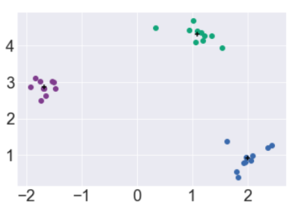

*Remember to specify a custom qualitative color palette.*

### 1c. Determining the number of clusters $k$

In this task, you will explore how to determine the number of clusters in a dataset.

- Implement `elbow_plot` in `kmeans.py`.
- Create an elbow plot below for the `super_simple` dataset. It should look like the below image.

**NOTE:** Make sure to include a meaningful x label, y label, and x tick marks.

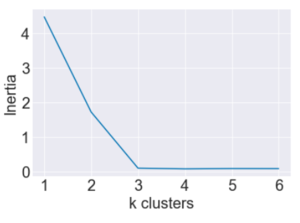

### 1d. Questions

**Question 1:** How many clusters are there in the `super_simple` data, based on the elbow plot that you made? Briefly explain how you determined this.

**Answer 1:**

### 1e. Clustering the `five_blobs` dataset

Load in the `five_blobs` dataset then in the cell below:
- create a scatterplot showing the 2D dataset (without any clustering).
- run K-means to cluster the dataset with a reasonable number of clusters (based on what you observe in the scatterplot).
- create a scatterplot showing the clustered data.

### 1f. Questions

**REMINDER:** You should not be submitting AI generated content (including answers to questions).

**Question 2:** Modify your code above to run K-means 5 times. Each time create a scatterplot showing the clusters and change the random seed value (e.g. `np.random.seed(0)`, `np.random.seed(1)`, etc.). The above cell should now output 5 scatter plots. What do you observe about how the cluster assignments match up with the clusters that you see visually? **Why does this happen?**

**Question 3:** Modify your code above again to also generate an elbow plot with `k` running from 1 to 10. The above cell should now output 10 plots. How predictive is the elbow plot of the number of clusters in the dataset? In order words, if you had to only rely on the elbow plot to determine the number of clusters (without looking at the scatterplot), how often would you be correct? **Explain your reasoning.**

**Answer 2:**

**Answer 3:**

### 1g. Run K-means multiple times, save the best clustering

To address what you observed above, we can run K-means multiple times and take the best results to determine the final clustering. Implement `cluster_batch` to run K-means multiple times with a chosen $k$ value.

In the cell below, run `cluster_batch` with 10 iterations for the `k` value you identified in Task 1e above. Make a new scatterplot of the cluster assignments.

In [ ]:
# place me before you batch cluster the dataset
np.random.seed(0)


### 1h. Questions

**Question 4:** Based on the clustered scatter plots, in way ways (if any) did the clustering improve? **Why?**

**Answer 4:** 

### 1i. Update elbow plot for the `five_blobs` dataset

Now that you have experimented with `cluster` and `cluster_batch`, update your `elbow_plot` method to use `cluster_batch` instead of `cluster`. To do this, add a keyword argument `n_iter` to `elbow_plot`. Give it a default value of 1. (*And don't forget to update the docstring to include the new parameter!*)

In the cell below, test out your updated `elbow_plot` method using the same max $k$ value and number of iterations (for each $k$ value) as you used above. Create an elbow plot showing the inertia with different $k$ values.

### 1j. Questions

**Question 5:** How predictive is the updated elbow plot of the number of clusters in the dataset compared to the previous ones that you made?

**Answer 5:** 